In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


In [2]:
# pip install keras
import keras; print(keras.__version__)

2.3.1


In [3]:
# pip install tensorflow

In [4]:
# pip install graphviz

In [5]:
# pip install pydot

In [6]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [7]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [8]:
test.isnull().sum()

id             0
description    0
dtype: int64

In [9]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [10]:
bins = [0,1,2,3]
review_names = ['excellent', 'good', 'bad']
train['ratingCategorical'] = pd.cut(train['ratingCategory'], bins, labels=review_names, include_lowest=True, right=False)

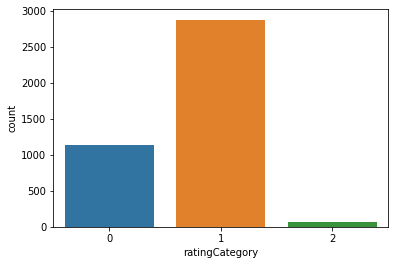

In [11]:
import seaborn as sns

sns.countplot(x='ratingCategory', data=train)

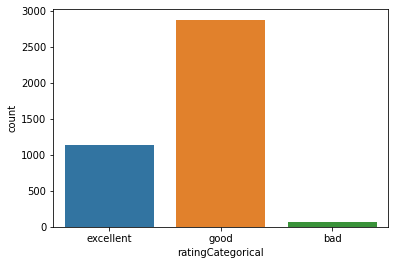

In [12]:
sns.countplot(x='ratingCategorical', data=train)

In [13]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [14]:
train['description'] = train['description'].apply(preprocess_text)

In [15]:
train.head(50)

,id,description,ratingCategory,ratingCategorical
0,1321,Sometimes when whisky is batched few leftover...,1,good
1,3861,An uncommon exclusive bottling of year old ca...,0,excellent
2,655,This release is port version of Amrut Interme...,1,good
3,555,This year old single cask was aged in sherry ...,1,good
4,1965,Quite herbal on the nose with aromas of dried...,1,good
5,3190,Cooley produced some great Irish single malt ...,1,good
6,3736,This year Ardbeg Day bottling is named in tri...,0,excellent
7,2643,As part of rebranding of the entire Talisker ...,1,good
8,4817,MacQueen has an impressive range of age state...,0,excellent
9,4528,Full gold color Layers of citrus fruit on the...,0,excellent


In [16]:
test['description'] = test['description'].apply(preprocess_text)

In [17]:
test.head()

,id,description
0,3461,Style Speyside single malt scotch Color Walnu...
1,2604,Very bright and lively with nice balance of f...
2,3341,new oloroso forward Chivas positioned to spli...
3,3764,Aged in bourbon casks and then enhanced in Ri...
4,2306,There is freshness to the wood on the nose la...


In [18]:
X_train = train['description']
X_test = test['description']

y_train = train['ratingCategorical']

In [19]:
print(train.shape)
train.head()

(4087, 4)


,id,description,ratingCategory,ratingCategorical
0,1321,Sometimes when whisky is batched few leftover...,1,good
1,3861,An uncommon exclusive bottling of year old ca...,0,excellent
2,655,This release is port version of Amrut Interme...,1,good
3,555,This year old single cask was aged in sherry ...,1,good
4,1965,Quite herbal on the nose with aromas of dried...,1,good


In [20]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train = label_encoder.fit_transform(y_train)

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [22]:
# X = []
# sentences = list(train["description"])
# for sen in sentences:
#     X.append(preprocess_text(sen))

# y = train['ratingCategory']

In [23]:
# they had this whole dataset together 
# then they broke it down to train test split

In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [25]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
from numpy import array
from numpy import asarray
from numpy import zeros
import os

GLOVE_DIR = '../glove'
embeddings_dictionary = dict()
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0]
    vector_dimensions = asarray(values[1:], dtype='float32') # TODO check. I removed the np as array and left asarray
    embeddings_dictionary [word] = vector_dimensions
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

# Glove file
# glove_file = 'data/glove.6B.100d.txt'

# for line in glove_file:
#     records = line.split()
#     word = records[0]
#     vector_dimensions = asarray(records[1:], dtype='float32')
#     embeddings_dictionary [word] = vector_dimensions

# glove_file.close()

Found 400000 word vectors.


In [28]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
# My working solution for now
# GLOVE_DIR = 'data'
# embeddings_index = {}
# f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [29]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=True)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1) # changed the Dense(3 to Dense(1 
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

#original setting for the model from the article 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])



In [30]:
print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 100)          1237800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,355,435
Trainable params: 1,355,435
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Error on line below with GraphViz maybe not set in PATH

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [33]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 3269 samples, validate on 818 samples
Epoch 1/10
3269/3269 [==============================] - 21s 6ms/step - loss: 0.6723 - acc: 0.7042 - val_loss: 0.6635 - val_acc: 0.7078
Epoch 2/10
3269/3269 [==============================] - 21s 6ms/step - loss: 0.6715 - acc: 0.7042 - val_loss: 0.6632 - val_acc: 0.7078
Epoch 3/10
3269/3269 [==============================] - 21s 6ms/step - loss: 0.6721 - acc: 0.7042 - val_loss: 0.6692 - val_acc: 0.7078
Epoch 4/10
3269/3269 [==============================] - 23s 7ms/step - loss: 0.6733 - acc: 0.7042 - val_loss: 0.6685 - val_acc: 0.7078
Epoch 5/10
3269/3269 [==============================] - 23s 7ms/step - loss: 0.6753 - acc: 0.7042 - val_loss: 0.6765 - val_acc: 0.7078
Epoch 6/10
3269/3269 [==============================] - 21s 7ms/step - loss: 0.6757 - acc: 0.7042 - val_loss: 0.6645 - val_acc: 0.7078
Epoch 7/10
3269/3269 [==============================] - 21s 7ms/step - loss: 0.6734 - acc: 0.7042 - val_loss: 0.6653 - val_acc: 0.7078
Epoch 8/

NameError: name 'y_test' is not defined

In [34]:
# TODO try this 
submission = history.predict(X_test)


AttributeError: 'History' object has no attribute 'predict'

In [35]:
submission = model.predict(X_test)

In [36]:
type(submission)


numpy.ndarray

In [42]:
print(submission)


[[0.01676738 0.278022   0.7052106 ]
 [0.01676738 0.27802202 0.7052106 ]
 [0.01676738 0.27802202 0.7052106 ]
 ...
 [0.01676738 0.278022   0.7052106 ]
 [0.01676738 0.278022   0.7052106 ]
 [0.01676738 0.27802202 0.7052106 ]]


In [43]:
print(len(submission))

1022


In [44]:
out_df = pd.DataFrame(submission,columns=['0', '1', '2'])


In [45]:
out_df.tail(150)

,0,1,2
872,0.016767,0.278022,0.705211
873,0.016767,0.278022,0.705211
874,0.016767,0.278022,0.705211
875,0.016767,0.278022,0.705211
876,0.016767,0.278022,0.705211
...,...,...,...
1017,0.016767,0.278022,0.705211
1018,0.016767,0.278022,0.705211
1019,0.016767,0.278022,0.705211
1020,0.016767,0.278022,0.705211


In [ ]:
out_df.describe()

In [41]:
# prediction = model.predict_classes(np.array(X_test))

#TODO TRY THIS 
# prediction = model.predict(np.array(X_test))
# prediction = model.predict(np.array(X_test))

AttributeError: 'Model' object has no attribute 'predict_classes'

In [40]:
prediction

array([[0.01676738, 0.278022  , 0.7052106 ],
       [0.01676738, 0.27802202, 0.7052106 ],
       [0.01676738, 0.27802202, 0.7052106 ],
       ...,
       [0.01676738, 0.278022  , 0.7052106 ],
       [0.01676738, 0.278022  , 0.7052106 ],
       [0.01676738, 0.27802202, 0.7052106 ]], dtype=float32)

In [ ]:
# ------------------ ! --------------------------

In [ ]:
# Predictions on test sample
# pred = gs_lr_tfidf.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
submission['ratingCategory'].value_counts()

In [ ]:
subNumber = 700

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1